# Projet NLP


Hopsore Thé

# Connection à Google Drive


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Projet_NLP

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-e4e9e53e3b30>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '/content/gdrive/MyDrive/Projet NLP 2023-2024 BROSSAY HOPSORE')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

In [ ]:
ls

gdrive/  sample_data/


# Importation des différentes librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


from gensim.models import Word2Vec,doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedKFold


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('./data.csv', encoding="latin-1")

In [ ]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


# Dataset analysis
Context : \\
The biomedical field offers a variety of challenges for the classification of textual documents. This dataset, composed of abstracts and full documents, focuses on solving these challenges by providing a wealth of information for document analysis and categorization. \\
It includes a range of documents, with a preference for longer research articles, in excess of 6 pages. This enables in-depth analysis of complex biomedical topics. \\
The dataset is labeled into three main cancer categories:  

* Thyroid cancer
* Colon Cancer
* Lung Cancer

Each category is represented by a specific number of samples, enabling precise classification and in-depth analysis. \\
 \\
The dataset therefore comprises three variables:

* An identifier
* A class label
* A search paper

\\
 As a first step, we'll delete the first column, which represents the observation index, and we'll also rename the columns to make them easier to understand.


In [ ]:
df.rename(columns = {'0' : 'class_label',
                     'a' : 'research_paper'}, inplace = True)

In [ ]:
df.drop(df.columns[0], axis = 1, inplace = True)

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

(7570, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class_label     7570 non-null   object
 1   research_paper  7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


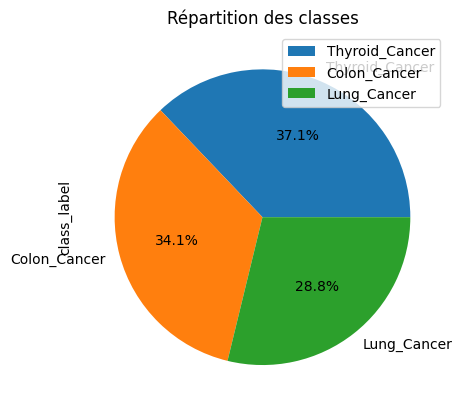

In [ ]:
df['class_label'].value_counts().plot(kind='pie', autopct = "%.1f%%")
plt.title('Répartition des classes')
plt.legend()
plt.show()

<ipython-input-26-697ff024fee7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
<ipython-input-26-697ff024fee7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_2, shade=True, color = 'blue')
<ipython-input-26-697ff024fee7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(num_3, shade=True, color = 'green')


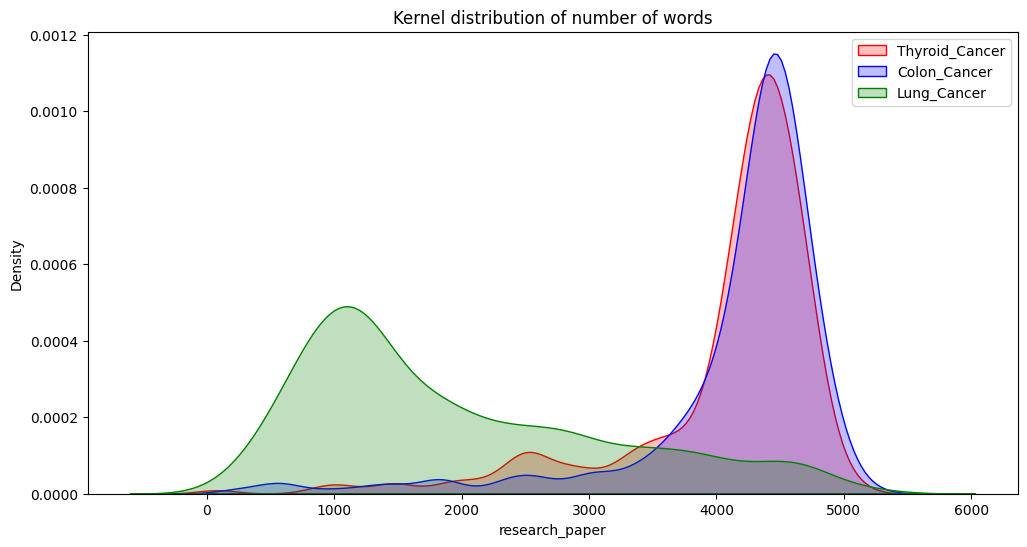

In [ ]:
num_1 = df[df['class_label']== 'Thyroid_Cancer']['research_paper'].apply(lambda x: len(x.split()))
num_2 = df[df['class_label']== 'Colon_Cancer']['research_paper'].apply(lambda x: len(x.split()))
num_3 = df[df['class_label']== 'Lung_Cancer']['research_paper'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
sns.kdeplot(num_1, shade=True, color = 'red').set_title('Kernel distribution of number of words')
sns.kdeplot(num_2, shade=True, color = 'blue')
sns.kdeplot(num_3, shade=True, color = 'green')

plt.legend(labels=['Thyroid_Cancer', 'Colon_Cancer', 'Lung_Cancer'])
plt.show()


As we can see, we have a roughly equal distribution of the three different text classes with :

* 37.1% for thyroid cancer
* 34.1% for colon cancer
* 28.8% for lung cancer.

 We also note that a large majority of thyroid and colon cancer documents are around 4,500 words long, corresponding to around 10 pages, while lung cancer documents are around 1,000 words.  
The dataset consists of 7570 observations, none of which are null. Given the nature of these observations, it might be interesting to reduce the size of the dataset we'll be working with.


# Text Processing

Here, the aim will be to prepare the data set for NLP methods, so we'll have to 'normalize' it by removing stopwords, tokenizing texts, etc... \\

As we saw above, documents are highly unequal in size, so logically, some words will be more present and therefore more influential than others. To solve this problem, we're going to divide the number of occurrences of each word in a document by the total number of words in that document. This logic is called TF-IDF : Term Frequency times Inverse Document Frequency. \\

We'll also be testing other Word Embedding methods, such as the Word2Vec and Document2Vec models.


In [ ]:
df.duplicated().sum()

6574

We note that 6574 observations are duplicates, so we will withdraw them.

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(996, 2)

In [ ]:
df.class_label = LabelEncoder().fit_transform(df['class_label'])

In [ ]:
df.head()

,class_label,research_paper
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


In [ ]:
df.research_paper = df['research_paper'].str.lower()

In [ ]:
df['token'] = df.research_paper.apply(word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['clean_token'] = df['token'].apply(lambda x: [item for item in x
                                                                   if (item not in stop_words and item.isalpha())])

In [ ]:
lemmatizer = WordNetLemmatizer()
df['clean_token'] = df['clean_token'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [ ]:
df.head()

,class_label,research_paper,token,clean_token
0,2,thyroid surgery in children in a single insti...,"[thyroid, surgery, in, children, in, a, single...","[thyroid, surgery, children, single, instituti..."
1,2,""" the adopted strategy was the same as that us...","[``, the, adopted, strategy, was, the, same, a...","[adopted, strategy, used, prior, years, based,..."
2,2,coronary arterybypass grafting thrombosis ï¬b...,"[coronary, arterybypass, grafting, thrombosis,...","[coronary, arterybypass, grafting, thrombosis,..."
3,2,solitary plasmacytoma sp of the skull is an u...,"[solitary, plasmacytoma, sp, of, the, skull, i...","[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,2,this study aimed to investigate serum matrix ...,"[this, study, aimed, to, investigate, serum, m...","[study, aimed, investigate, serum, matrix, met..."


## TF-IDF
![texte du lien](https://www.seoquantum.com/sites/default/files/tf-idf-2-1-1024x375.png)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['token'].apply(lambda x: ' '.join(x)))

y = df['class_label'].tolist()

# Division du jeu de données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def resultats(y_test, y_pred):
  print("Matrice de confusion:\n",confusion_matrix(y_test,y_pred))
  print()
  print("Rapport de Classfication:\n",classification_report(y_test,y_pred))
  print()
  sv_acc_test=accuracy_score(y_test,y_pred)
  print("Accuracy sur dataset de test:",sv_acc_test)

In [ ]:
sv_model = SVC()
sv_model.fit(X_train, y_train)

SVC()

In [ ]:
def test_results(sv_model, X_train, X_test, y_train, y_test):
  print('Test Set')
  y_pred=sv_model.predict(X_test)
  resultats(y_test, y_pred)
  print("****************************************************************")
  print('Train Set')
  y_pred_train=sv_model.predict(X_train)
  resultats(y_train, y_pred_train)

In [ ]:
test_results(sv_model, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[10  2 43]
 [ 0 89  0]
 [13  0 43]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.43      0.18      0.26        55
           1       0.98      1.00      0.99        89
           2       0.50      0.77      0.61        56

    accuracy                           0.71       200
   macro avg       0.64      0.65      0.62       200
weighted avg       0.69      0.71      0.68       200


Accuracy sur dataset de test: 0.71
****************************************************************
Train Set
Matrice de confusion:
 [[189   0  17]
 [  0 363   0]
 [  6   0 221]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       206
           1       1.00      1.00      1.00       363
           2       0.93      0.97      0.95       227

    accuracy                           0.97       796
   macro avg       0.97      0.96      0.9

In [ ]:
def best_model(X_train, y_train):
  svc_model=SVC()
  param_grid={"C":np.arange(1,50),
            "kernel":['linear','poly','rbf','sigmoid']}

  kfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=10)

  rscv_svc_model=RandomizedSearchCV(svc_model,param_grid,cv=kfold)
  rscv_svc_model.fit(X_train, y_train)
  return rscv_svc_model.best_estimator_


In [ ]:
best_svm_tfidf = best_model(X_train, y_train)

In [ ]:
test_results(best_svm_tfidf, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[24  2 29]
 [ 0 89  0]
 [16  0 40]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.60      0.44      0.51        55
           1       0.98      1.00      0.99        89
           2       0.58      0.71      0.64        56

    accuracy                           0.77       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.76      0.77      0.76       200


Accuracy sur dataset de test: 0.765
****************************************************************
Train Set
Matrice de confusion:
 [[203   0   3]
 [  0 363   0]
 [  4   0 223]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       1.00      1.00      1.00       363
           2       0.99      0.98      0.98       227

    accuracy                           0.99       796
   macro avg       0.99      0.99      0.

In [ ]:
print("Label de base:",y_test[:10])
print("Label prédit:",y_pred[:10])

## Word2Vec
![texte du lien](https://swimm.io/wp-content/webp-express/webp-images/uploads/2023/11/word2vec--1024x559.png.webp)



1.   **Continuous Bag of Words (CBOW)**




**Step 1: Input encoding
Each word in the vocabulary is represented as a one-hot encoded vector:
For a vocabulary of size V, a target word t is represented by one-hot(t), where one-hot(t) is a binary vector of size V with a 1 at the index corresponding to the target word.

**Step 2: Word integration layer**
Word integration is represented by a matrix E of size V x N, where N is the dimension of the word integration.
The integration of a target word t is obtained by e(t) = E * one-hot(t).

**Step 3: Aggregation of contextual integrations
Context words are represented as one-hot encoded vectors and averaged to create a context vector h :
h = (1/|c|) * ΣE * one-hot(c), where |c| is the number of contextual words.

**Step 4: Hidden layer**
The context vector h passes through a hidden layer with weights W and bias b, which introduces a non-linearity:
h' = f(W * h + b), where f is an activation function such as ReLU or sigmoid.

**Step 5: Output layer
The hidden representation h' is used to predict the probability distribution of vocabulary words.
The output layer uses the softmax function to calculate the predicted probabilities for each word:
y = softmax(V * h'), where V is the output weight matrix.

**Step 6: Loss calculation
The loss function measures the dissimilarity between the predicted word probabilities (y) and the true distribution of the target word.

**Step 7: Backpropagation and training** The parameters of the model (E, W) are calculated.
Model parameters (E, W and V) are updated using backpropagation and gradient descent to minimize loss.

**Step 8: Word embedding**
After training, the rows of the embedding matrix E represent word embeddings, which capture the meaning of words in a dense vector space.



2. **Skip-gram**

**Step 1: Input encoding

Each word in the vocabulary is represented as a one-hot encoded vector:

For a vocabulary of size V, a target word t is represented by one-hot(t), where one-hot(t) is a binary vector of size V with a 1 at the index corresponding to the target word.

**Step 2: Word integration layer**

Word integration is represented by a matrix E of size V x N, where N is the dimension of the word integration.
The integration of a target word t is obtained by e(t) = E * one-hot(t).

**Step 3: Hidden layer**

The integration e(t) for target word t passes through a hidden layer with weights W and bias b to obtain a hidden representation h :
h = f(W * e(t) + b), where f is an activation function such as ReLU or sigmoid.

**Step 4: Output layer

The hidden representation h is used to predict the probability distribution of vocabulary words.
The output layer uses the softmax function to calculate the predicted probabilities for each word:
y = softmax(V * h), where V is the output weight matrix.

**Step 5: Loss computation**

The loss function measures the dissimilarity between the predicted word probabilities (y) and the true distribution of words in the context surrounding the target word.

**Step 6: Backpropagation and training**

Model parameters (E, W and V) are updated using backpropagation and gradient descent to minimize loss.

**Step 7: Word embedding**

After training, the rows of the embedding matrix E represent word embeddings, which capture the meaning of words in a dense vector space.

In [ ]:
tokens = df['token'].tolist()  # Convertir les tokens en liste
word2vec_model = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)

# Représentation vectorielle des articles
def article_vector(tokens):
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

X = df['token'].apply(article_vector).tolist()  # Utilisez directement les valeurs de la colonne "token"
y = df['class_label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
sv_model_word2vec = SVC()
sv_model_word2vec.fit(X_train, y_train)

SVC()

In [ ]:
test_results(sv_model_word2vec, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[23  0 32]
 [ 0 89  0]
 [19  0 37]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.55      0.42      0.47        55
           1       1.00      1.00      1.00        89
           2       0.54      0.66      0.59        56

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.75      0.74      0.74       200


Accuracy sur dataset de test: 0.745
****************************************************************
Train Set
Matrice de confusion:
 [[100   0 106]
 [  0 362   1]
 [ 60   0 167]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55       206
           1       1.00      1.00      1.00       363
           2       0.61      0.74      0.67       227

    accuracy                           0.79       796
   macro avg       0.74      0.74      0.

In [ ]:
best_svm_word2vec = best_model(X_train, y_train)

In [ ]:
best_svm_word2vec.get_params()

{'C': 21,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
test_results(best_svm_word2vec, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[30  0 25]
 [ 0 89  0]
 [19  0 37]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.61      0.55      0.58        55
           1       1.00      1.00      1.00        89
           2       0.60      0.66      0.63        56

    accuracy                           0.78       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.78      0.78      0.78       200


Accuracy sur dataset de test: 0.78
****************************************************************
Train Set
Matrice de confusion:
 [[155   0  51]
 [  0 363   0]
 [ 65   0 162]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.70      0.75      0.73       206
           1       1.00      1.00      1.00       363
           2       0.76      0.71      0.74       227

    accuracy                           0.85       796
   macro avg       0.82      0.82      0.8

In [ ]:
print("Label de base:",y_test[:10])
print("Label prédit:",y_pred[:10])

Label de base: [1, 1, 2, 1, 0, 2, 0, 2, 1, 1]
Label prédit: [1 1 2 1 2 0 0 2 1 1]


## Document2Vec
![texte du lien](https://miro.medium.com/v2/resize:fit:640/format:webp/0*x-gtU4UlO8FAsRvL.)

In [ ]:
documents = [TaggedDocument(words=token, tags=[str(i)]) for i, token in enumerate(df['token'].tolist())]

# Entraînement du modèle Doc2Vec
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=20)  # Réglez le nombre d'époques selon vos besoins

# Représentation vectorielle des articles
def document_vector(tokens):
    return doc2vec_model.infer_vector(tokens)

X = df['token'].apply(document_vector).tolist()  # Supprimer l'appel à split()
y = df['class_label'].tolist()

# Division du jeu de données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sv_model_doc2vec = SVC()
sv_model_doc2vec.fit(X_train, y_train)

SVC()

In [ ]:
test_results(sv_model_doc2vec, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[23  0 32]
 [ 0 89  0]
 [25  0 31]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.48      0.42      0.45        55
           1       1.00      1.00      1.00        89
           2       0.49      0.55      0.52        56

    accuracy                           0.71       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.71      0.71      0.71       200


Accuracy sur dataset de test: 0.715
****************************************************************
Train Set
Matrice de confusion:
 [[183   2  21]
 [  0 363   0]
 [ 21   1 205]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       206
           1       0.99      1.00      1.00       363
           2       0.91      0.90      0.91       227

    accuracy                           0.94       796
   macro avg       0.93      0.93      0.

In [ ]:
best_svm_doc2vec = best_model(X_train, y_train)

In [ ]:
best_svm_doc2vec

SVC(C=37)

In [ ]:
test_results(best_svm_doc2vec, X_train, X_test, y_train, y_test)

Test Set
Matrice de confusion:
 [[25  0 30]
 [ 0 89  0]
 [21  0 35]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.54      0.45      0.50        55
           1       1.00      1.00      1.00        89
           2       0.54      0.62      0.58        56

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.75      0.74      0.74       200


Accuracy sur dataset de test: 0.745
****************************************************************
Train Set
Matrice de confusion:
 [[205   0   1]
 [  0 363   0]
 [  6   0 221]]

Rapport de Classfication:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       206
           1       1.00      1.00      1.00       363
           2       1.00      0.97      0.98       227

    accuracy                           0.99       796
   macro avg       0.99      0.99      0.

In [ ]:
print("Label de base:",y_test[:10])
print("Label prédit:",y_pred[:10])

Label de base: [1, 1, 2, 1, 0, 2, 0, 2, 1, 1]
Label prédit: [1 1 2 1 2 0 0 2 1 1]


After testing different Word Embedding techniques and selecting the best SVM parameter for each, we find that the best estimator is in the case of a Word2Vec with an SVM of parameter C = 21 and kernel = Radial Basis Function. \\
With these parameters, we obtain an accuracy of 78% on the test set.